<a href="https://colab.research.google.com/github/NataliFA/TeorVer/blob/main/%D0%94%D0%97_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

1. *Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
 zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
 ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.*

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(ks)

b1 = (n * np.sum(zp*ks) - np.sum(zp) * np.sum(ks)) / (n*np.sum(zp**2) - np.sum(zp)**2)
print(f"{b1=:.3f}")

b0 = np.mean(ks) - b1 * np.mean(zp)
print(f"{b0=:.3f}")

y_pred = b0 + b1*zp
print(f"{y_pred=}")

zp = zp.reshape((-1,1))

model = LinearRegression().fit(zp, ks)
print(f"b1 = {model.coef_[0]:.3f}")
print(f"b0 = {model.intercept_:.3f}")
print(model.predict(zp))


b1=2.621
b0=444.177
y_pred=array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])
b1 = 2.621
b0 = 444.177
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


2. *Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).*

In [ ]:
alpha = 1e-6
b1 = 0.1

def mse(b1, x = zp, y = ks, n = len(ks)):
  return np.sum((b1 * x - y)**2) / n

for i in range(3000):
  b1 -= alpha * (2/n) * np.sum((b1*zp - ks) * zp)
  if i % 500 == 0:
    print(f"iteration ={i}, b1 = {b1:.2f}, mse = {mse(b1)}")

print(mse(b1))

iteration =0, b1 = 1.51, mse = 3482303.128993106
iteration =500, b1 = 5.23, mse = 1583053.5328313226
iteration =1000, b1 = 5.23, mse = 1583053.5328313226
iteration =1500, b1 = 5.23, mse = 1583053.5328313226
iteration =2000, b1 = 5.23, mse = 1583053.5328313226
iteration =2500, b1 = 5.23, mse = 1583053.5328313226
1583053.5328313226


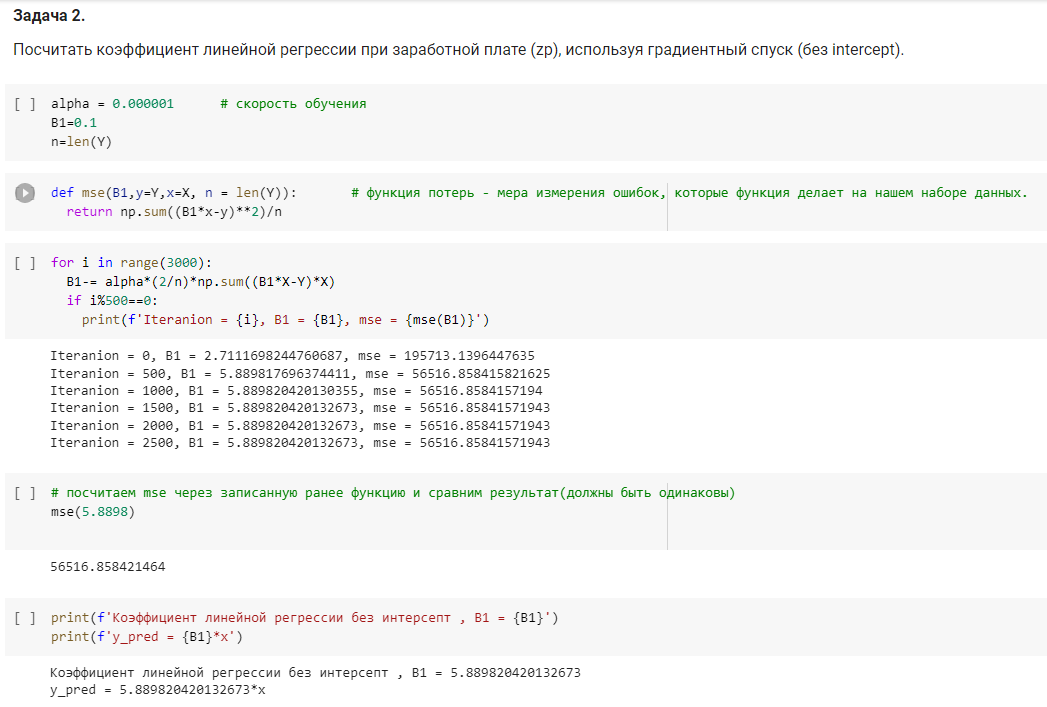

3. *Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).*  

In [ ]:
alpha = 1e-6

model = LinearRegression().fit(zp, ks)

for i in range(10000):
  b1 -= alpha * (2/n) * np.sum((b1*zp - ks) * zp)
  b0 = model.intercept_
  if i % 1000 == 0:\
    print(f"iteration ={i}, b0 = {b0:.2f}, b1 = {b1:.2f}")

iteration =0, b0 = 444.18, b1 = 3.34
iteration =1000, b0 = 444.18, b1 = 5.23
iteration =2000, b0 = 444.18, b1 = 5.23
iteration =3000, b0 = 444.18, b1 = 5.23
iteration =4000, b0 = 444.18, b1 = 5.23
iteration =5000, b0 = 444.18, b1 = 5.23
iteration =6000, b0 = 444.18, b1 = 5.23
iteration =7000, b0 = 444.18, b1 = 5.23
iteration =8000, b0 = 444.18, b1 = 5.23
iteration =9000, b0 = 444.18, b1 = 5.23


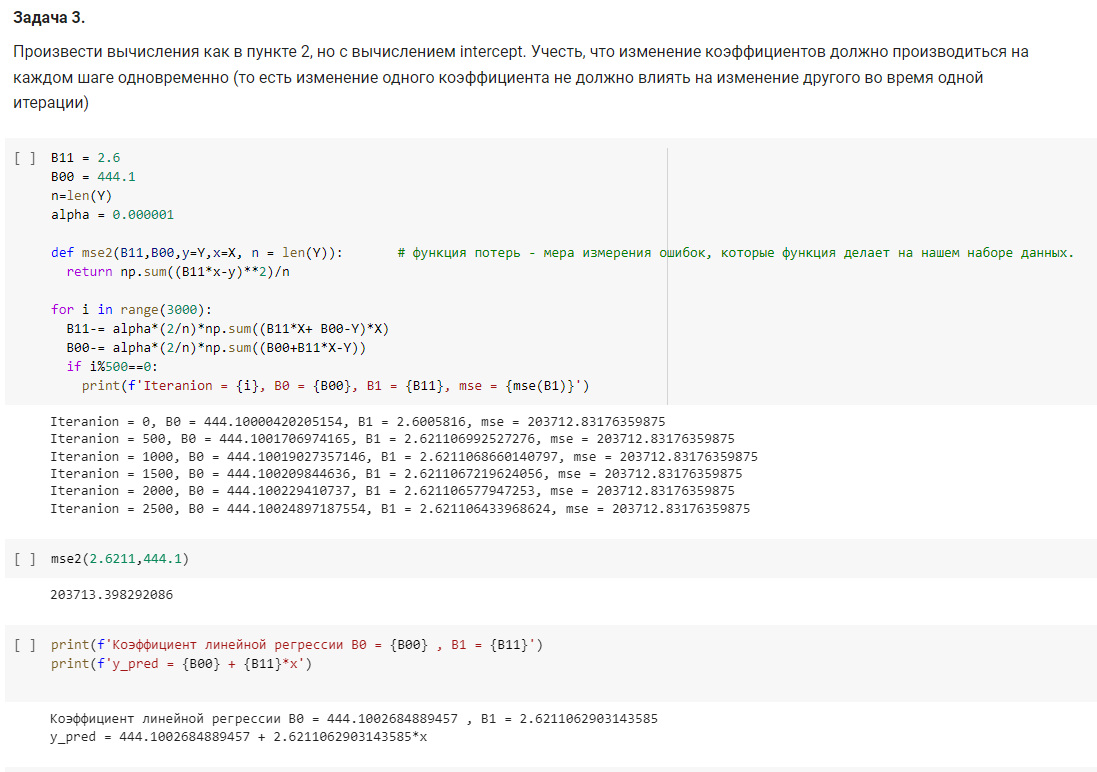